# Stats and probability (3)

### This notebook contain examples for slides page 35-44.
#### Topics covered: 
1. log normal distribution
2. Exponential distribution
3. Pareto distribution
4. Use CCDF to verify exponential and pareto distribution

#### Data needed:
1. brfss.csv

In [1]:
# load modules needed
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import pandas as pd

np.random.seed(0)

In [2]:
def myHist(data, nBins=50, xlabel='X', ylabel='Frequency', title='hist'):
    plt.hist(data, nBins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## 1. Log normal distribution
   Data is log normal distributed if it follows a normal distribution after log transformation

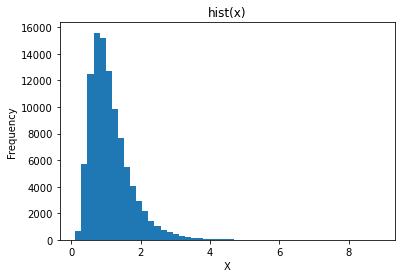

In [31]:
x = np.random.lognormal(0, 0.5, 10**5)  # generate 100,000 data points from a log normal distribution
myHist(x, title='hist(x)')

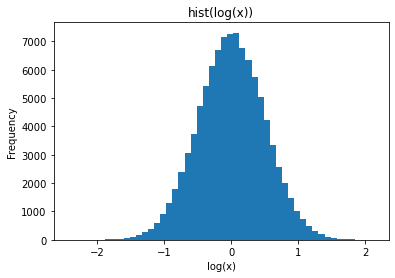

In [4]:
myHist(np.log(x), xlabel='log(x)', title='hist(log(x))')


In [5]:
def plot_cdf(data):
    x = np.sort(data)
    size = len(data)
    y = (1+np.arange(size))/size
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('prob(value $\leq$ x)') # between $$ is latex math mode
    plt.title('CDF')
    plt.show()
    return (x, y)
    
def normProbPlot(data, ylabel='Data', title='Normal probablity plot'):
    a = np.random.randn(len(data))
    plt.scatter(np.sort(a), np.sort(data))
    plt.xlabel('Standard Normal')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

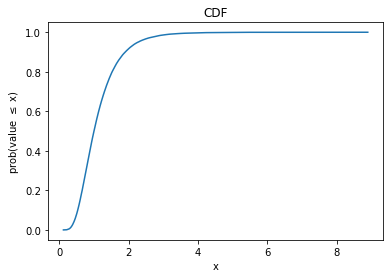

(array([0.11681356, 0.12060965, 0.13322934, ..., 6.92106996, 7.18341558,
        8.89159526]),
 array([1.0000e-05, 2.0000e-05, 3.0000e-05, ..., 9.9998e-01, 9.9999e-01,
        1.0000e+00]))

In [32]:
plot_cdf(x)

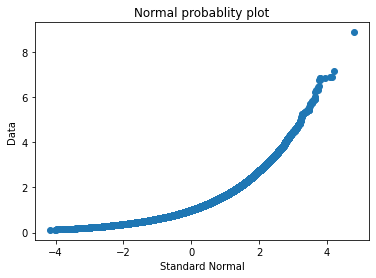

In [33]:
normProbPlot(x)

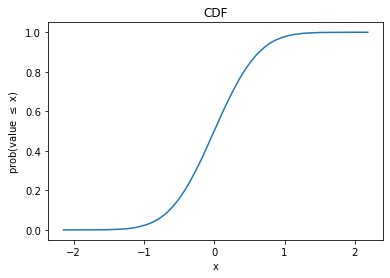

(array([-2.14717608, -2.11519595, -2.01568329, ...,  1.93457038,
         1.97177498,  2.18510648]),
 array([1.0000e-05, 2.0000e-05, 3.0000e-05, ..., 9.9998e-01, 9.9999e-01,
        1.0000e+00]))

In [34]:
plot_cdf(np.log(x))

#### Evidence that data follows log normal distribution

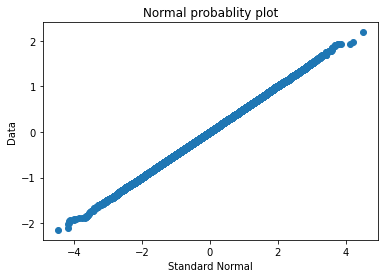

In [35]:
normProbPlot(np.log(x))

#### Weight data is log normal distributed

In [8]:
df = pd.read_csv('brfss.csv')
missing = np.any(np.isnan(df), axis=1)
h = df.htm3[~missing].values # height of Us adults
w = df.weight2[~missing].values # weights of Us adults

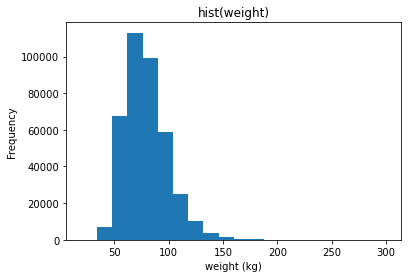

In [9]:
myHist(w, xlabel='weight (kg)', title='hist(weight)', nBins=20)

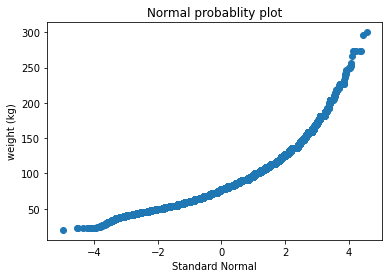

In [10]:
normProbPlot(w, ylabel='weight (kg)')

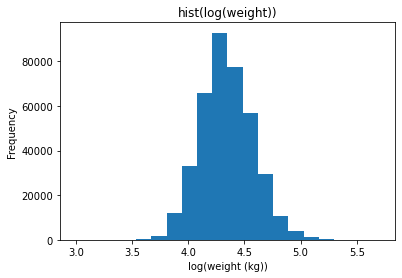

In [38]:
myHist(np.log(w), xlabel='log(weight (kg))', title='hist(log(weight))', nBins=20)

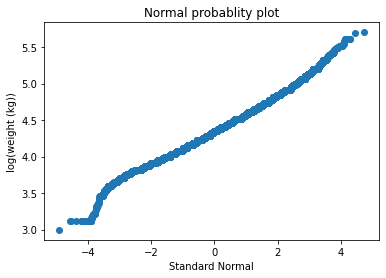

In [12]:
normProbPlot(np.log(w), ylabel='log(weight (kg))')

In [39]:
print('Correlation between weight and height is: %.3f' % np.corrcoef(w, h)[0][1])
print('Correlation between log(weight) and height is: %.3f' % np.corrcoef(np.log(w), h)[0][1])

Correlation between weight and height is: 0.511
Correlation between log(weight) and height is: 0.534


In [40]:
isMale = df.sex[~missing] == 1
print('Correlation between male log(weight) and height is: %.3f' % np.corrcoef(np.log(w[isMale]), h[isMale])[0][1])
print('Correlation between female log(weight) and height is: %.3f' % np.corrcoef(np.log(w[~isMale]), h[~isMale])[0][1])

Correlation between male log(weight) and height is: 0.444
Correlation between female log(weight) and height is: 0.313


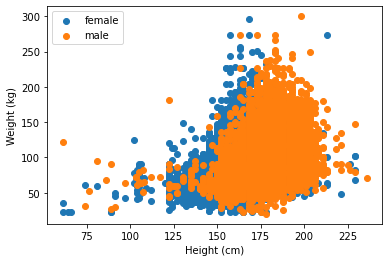

In [41]:
plt.scatter(h[~isMale], w[~isMale])
plt.scatter(h[isMale], w[isMale])
plt.legend(('female', 'male'))
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

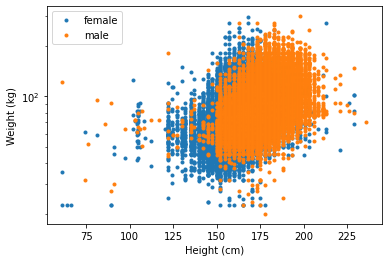

In [16]:
plt.semilogy(h[~isMale], w[~isMale], '.')
plt.semilogy(h[isMale], w[isMale], '.')
plt.legend(('female', 'male'))
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Theoretical PDF and CDF of log normal distribution

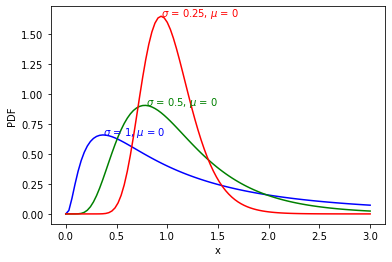

In [17]:
from scipy.stats import lognorm
x = np.linspace(0, 3, 100)
sigma = [1, 0.5, 0.25]
colors = 'bgr'
for i in range(len(sigma)):
    y = lognorm.pdf(x, loc=0, s=sigma[i])
    plt.plot(x, y, color=colors[i])    
    plt.annotate('$\sigma$ = %.2g, $\mu$ = 0' %sigma[i], [x[np.argmax(y)], np.max(y)], color=colors[i])

plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

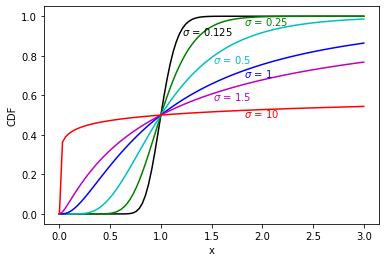

In [18]:
x = np.linspace(0, 3, 100)
colors = 'kgcbmr'
sigma = [0.125, 0.25, 0.5, 1, 1.5, 10]
xpoints = [40, 60, 50, 60, 50, 60]

for i in range(len(sigma)):
    y = lognorm.cdf(x, loc=0, s=sigma[i])
    plt.plot(x, y, color=colors[i])    
    plt.annotate('$\sigma$ = %.3g' %sigma[i], [x[xpoints[i]], y[xpoints[i]]], xytext=[0,-7], textcoords='offset points', color=colors[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

### Exponential distribution

#### Theoretical PDF and CDF of exponential distribution

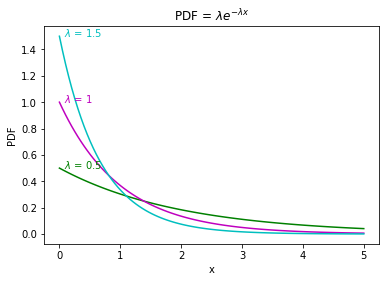

In [42]:
from scipy.stats import expon
x = np.linspace(0, 5, 100)
colors = 'gmc'
lamb = [0.5, 1, 1.5]

for i in range(len(lamb)):
    y = expon.pdf(x, loc=0, scale=1/lamb[i])
    plt.plot(x, y, color=colors[i])    
    plt.annotate('$\lambda$ = %.3g' %lamb[i], [x[0], y[0]], xytext=[5,0], textcoords='offset points', color=colors[i])

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF = $\lambda e^{-\lambda x}$') # between $$ is latex math mode
plt.show()

In [43]:
x # x is generated by np.linspace

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

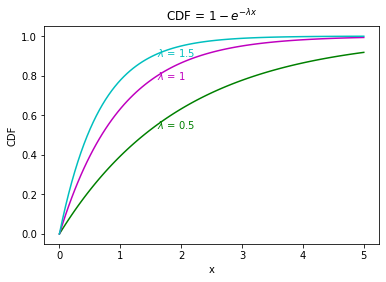

In [20]:
from scipy.stats import expon
x = np.linspace(0, 5, 100)
colors = 'gmc'
lamb = [0.5, 1, 1.5]

for i in range(len(lamb)):
    y = expon.cdf(x, loc=0, scale=1/lamb[i])
    plt.plot(x, y, color=colors[i])    
    plt.annotate('$\lambda$ = %.3g' %lamb[i], [x[30], y[30]], xytext=[5,0], textcoords='offset points', color=colors[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF = $1 - e^{-\lambda x}$')  # between $$ is latex math mode
plt.show()

#### Interval time is exponentially distributed

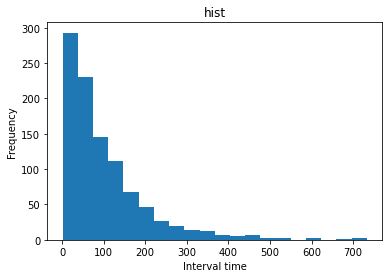

In [60]:
arrivalTime = np.unique((np.random.rand(1000) * 10**5).round());
data = np.diff(arrivalTime);
myHist(data, xlabel='Interval time', nBins=20)

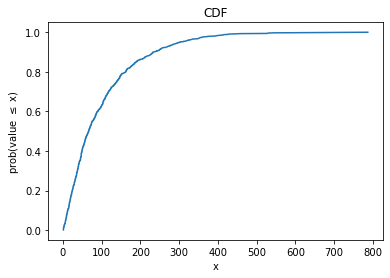

In [22]:
[x,cdf]=plot_cdf(data)

#### CCDF of exponentially distributed data

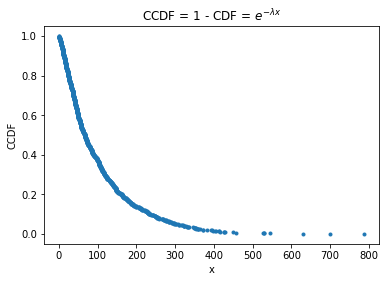

In [23]:
plt.plot(x, 1-cdf, '.')
plt.xlabel('x')
plt.ylabel('CCDF')
plt.title('CCDF')
plt.title('CCDF = 1 - CDF = $e^{-\lambda x}$')
plt.show()

#### Evidence that data follows exponential distribution

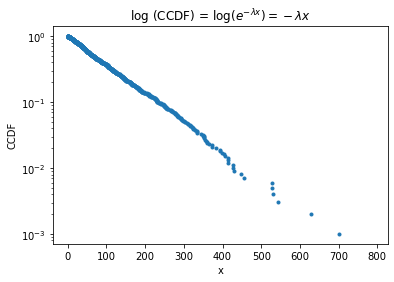

In [24]:
plt.semilogy(x, 1-cdf, '.')
plt.xlabel('x')
plt.ylabel('CCDF')
plt.title('log(CCDF)')
plt.title('log (CCDF) = $\log (e^{-\lambda x}) = -\lambda x$')
plt.show()

### Pareto distribution

#### Theoretical pdf and cdf of pareto distribution

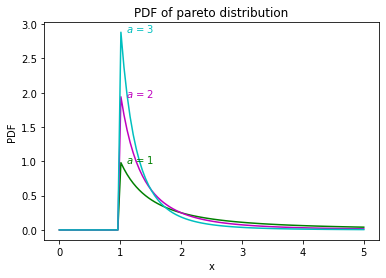

In [25]:
from scipy.stats import pareto
x = np.linspace(0, 5, 100)
colors = 'gmc'
alpha = [1, 2, 3]

for i in range(len(alpha)):
    y = pareto.pdf(x, b=alpha[i])
    plt.plot(x, y, color=colors[i])    
    plt.annotate('$a$ = %.3g' %alpha[i], [x[np.argmax(y)], np.max(y)], xytext=[5,0], textcoords='offset points', color=colors[i])

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of pareto distribution')
plt.show()

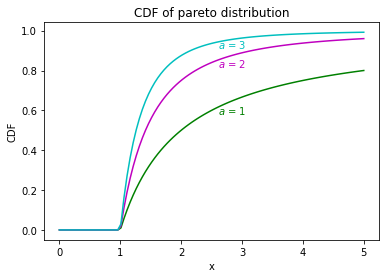

In [26]:
from scipy.stats import pareto
x = np.linspace(0, 5, 100)
colors = 'gmc'
alpha = [1, 2, 3]

for i in range(len(alpha)):
    y = pareto.cdf(x, b=alpha[i])
    plt.plot(x, y, color=colors[i])    
    plt.annotate('$a$ = %.3g' %alpha[i], [x[50], y[50]], xytext=[5,-5], textcoords='offset points', color=colors[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF of pareto distribution')
plt.show()

#### CDF and CCDF of Pareto distributed data

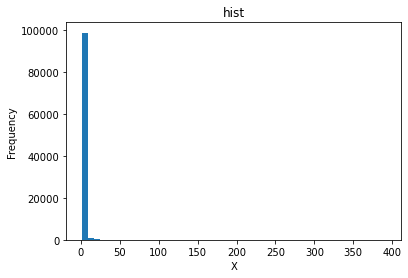

In [67]:
data = np.random.pareto(2, 10**5) + 1   # see numpy manual for pareto II vs classical pareto
myHist(data)

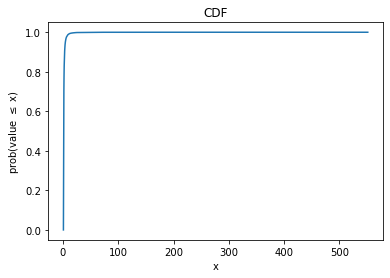

In [64]:
[x, cdf] = plot_cdf(data)

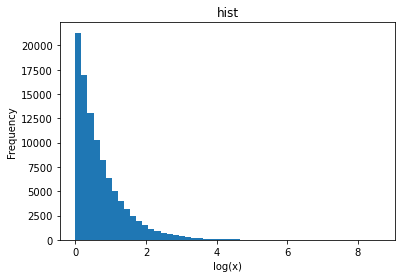

In [68]:
myHist(np.log2(data), xlabel='log(x)')

#### Evidence that data follows pareto distribution

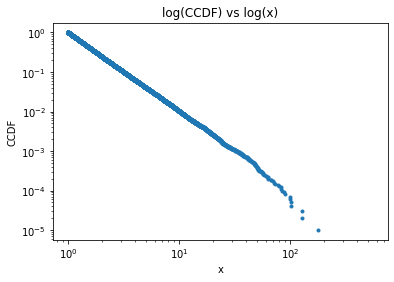

In [69]:
plt.loglog(x, 1-cdf, '.')
plt.xlabel('x')
plt.ylabel('CCDF')
plt.title('log(CCDF) vs log(x)')
plt.show()